In [1]:
import matplotlib.pyplot as plt
import numpy as np

notre fonction est $$ f(x) = (x-1)(x^2-1) $$

In [2]:
def f(x):
    return (x-1)*((x**2)+1)

In [3]:
def df(x):
    return 3*x**2 - 2*x + 1

In [4]:
def newton(f,df, x_0, epsilon):
    #trouve la valeur
    x = x_0 - (f(x_0)/df(x_0))
    max_iter = 1000
    
    for n in range(max_iter):
        x_new = x - (f(x)/df(x))
        
        if abs(x_new - x) < epsilon:
            print("found result in",n,"iterations")
            return x_new
        x = x_new
    
    print("value not found, took too long")
    
    return None        
    

In [5]:
print(newton(f,df,5,epsilon=0.000000001))

found result in 7 iterations
1.0


In [6]:
print(newton(f,df,-1+-5j,epsilon=0.000000001))

found result in 7 iterations
(-1.2712085804320787e-22-1j)


### Newton en 2D

on cherche les solutions du système d'équations:

$$ x^2 + y^2 = 2 $$

$$ x^2 - y^2 = 1 $$

on peut trouver les solutions qui sont:

$$ x_* = \sqrt{\frac{3}{2}}, y_* = \frac{\sqrt{2}}{2} $$

In [7]:
from math import sqrt

def f2(x,y):
    
    phi1 = x**2 + y**2 - 2
    phi2 = x**2 - y**2 - 1
    
    return np.array([phi1,phi2])

In [8]:
def jac_f2(x,y):
    # returns 2d jacobian matrix
    
    phi1_x = 2*x 
    phi1_y = 2*y
    
    phi2_x = 2*x
    phi2_y = -2*y
    
    return np.array([[phi1_x,phi1_y],[phi2_x,phi2_y]])

In [9]:
def newton2(f,df,x_0,y_0,epsilon=1e-7):
    
    X = np.zeros((2,1))
    
    X = x_0 - np.dot(np.linalg.inv(df(x_0,y_0)) , f(x_0,y_0))
    
    max_iter = 1000
    
    err = []
    
    roots = np.array([1.22474487, 0.70710678])
    
    for n in range(max_iter):
        
        X_new = X - np.dot( np.linalg.inv(df(X[0],X[1])) , f(X[0],X[1]))
        
        print("X_n+1 à l'itération",n,"est:",X_new)
        
        error = np.log(abs(abs(X_new) - abs(roots) ) )
        err.append(error)
        
        if np.linalg.norm(X-X_new) < epsilon:
            print("found solution in",n,"iterations")
            
            plt.figure()
            plt.title("error")
            plt.plot(err)
            plt.show()
            return X
        
        X = X_new
        
    print("no sol found")
    return None
    
    
    

X_n+1 à l'itération 0 est: [1.225      0.70833333]
X_n+1 à l'itération 1 est: [1.2247449  0.70710784]
X_n+1 à l'itération 2 est: [1.22474487 0.70710678]
X_n+1 à l'itération 3 est: [1.22474487 0.70710678]
found solution in 3 iterations


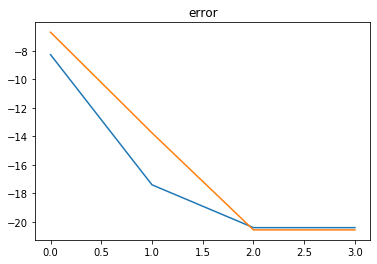

array([1.22474487, 0.70710678])

In [10]:
newton2(f2,jac_f2,1,1)

X_n+1 à l'itération 0 est: [3.87433775 3.79159276]
X_n+1 à l'itération 1 est: [2.13075035 1.96173173]
X_n+1 à l'itération 2 est: [1.41736385 1.10830429]
X_n+1 à l'itération 3 est: [1.23783328 0.77972197]
X_n+1 à l'itération 4 est: [1.22481407 0.71048809]
X_n+1 à l'itération 5 est: [1.22474487 0.70711483]
X_n+1 à l'itération 6 est: [1.22474487 0.70710678]
X_n+1 à l'itération 7 est: [1.22474487 0.70710678]
found solution in 7 iterations


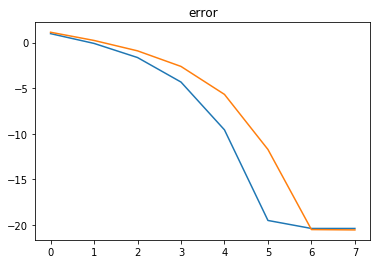

array([1.22474487, 0.70710678])

In [11]:
newton2(f2,jac_f2,15,15)

pour que l'algorithme fonctionne convenablement, il faut que la matrice soit bien inversible à chaque itération. Si jamais elle n'est pas inversible, il faut changer la valeur initiale X_0

### Test simulation aved diff valeurs $X^0$

testing newton algo for X_0: [0.5 1. ]
X_n+1 à l'itération 0 est: [1.30357143 1.125     ]
X_n+1 à l'itération 1 est: [1.22712818 0.78472222]
X_n+1 à l'itération 2 est: [1.22474719 0.71094518]
X_n+1 à l'itération 3 est: [1.22474487 0.70711714]
X_n+1 à l'itération 4 est: [1.22474487 0.70710678]
X_n+1 à l'itération 5 est: [1.22474487 0.70710678]
found solution in 5 iterations


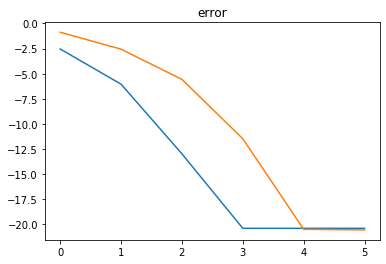

testing newton algo for X_0: [0.25 1.  ]
algo failed, matrix not inversible,choose new initial values


testing newton algo for X_0: [0.125 1.   ]
X_n+1 à l'itération 0 est: [ 3.15496134 -2.0625    ]
X_n+1 à l'itération 1 est: [ 1.81520149 -1.15246212]
X_n+1 à l'itération 2 est: [ 1.32077802 -0.79315793]
X_n+1 à l'itération 3 est: [ 1.22823613 -0.7117747 ]
X_n+1 à l'itération 4 est: [ 1.22474983 -0.70712209]
X_n+1 à l'itération 5 est: [ 1.22474487 -0.70710678]
X_n+1 à l'itération 6 est: [ 1.22474487 -0.70710678]
found solution in 6 iterations


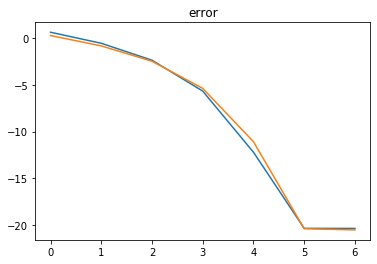

testing newton algo for X_0: [0.0625 1.    ]
X_n+1 à l'itération 0 est: [ 6.07796266 -1.42708333]
X_n+1 à l'itération 1 est: [ 3.16237794 -0.88872415]
X_n+1 à l'itération 2 est: [ 1.81835228 -0.72566421]
X_n+1 à l'itération 3 est: [ 1.32163747 -0.70734407]
X_n+1 à l'itération 4 est: [ 1.22829659 -0.70710682]
X_n+1 à l'itération 5 est: [ 1.22475001 -0.70710678]
X_n+1 à l'itération 6 est: [ 1.22474487 -0.70710678]
X_n+1 à l'itération 7 est: [ 1.22474487 -0.70710678]
found solution in 7 iterations


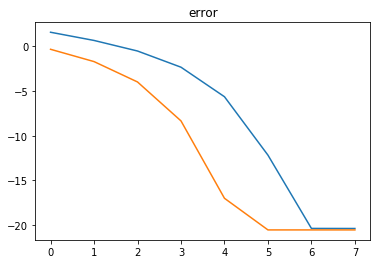

testing newton algo for X_0: [0.03125 1.     ]
X_n+1 à l'itération 0 est: [12.03904217 -1.25223214]
X_n+1 à l'itération 1 est: [ 6.0818184  -0.82575957]
X_n+1 à l'itération 2 est: [ 3.16422758 -0.71563135]
X_n+1 à l'itération 3 est: [ 1.81913846 -0.70715755]
X_n+1 à l'itération 4 est: [ 1.32185231 -0.70710678]
X_n+1 à l'itération 5 est: [ 1.22831178 -0.70710678]
X_n+1 à l'itération 6 est: [ 1.22475005 -0.70710678]
X_n+1 à l'itération 7 est: [ 1.22474487 -0.70710678]
X_n+1 à l'itération 8 est: [ 1.22474487 -0.70710678]
found solution in 8 iterations


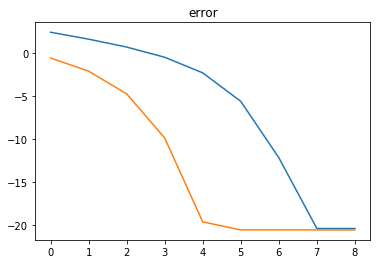

testing newton algo for X_0: [0.015625 1.      ]
X_n+1 à l'itération 0 est: [24.01952871 -1.18385417]
X_n+1 à l'itération 1 est: [12.04098895 -0.80310174]
X_n+1 à l'itération 2 est: [ 6.08278172 -0.71284393]
X_n+1 à l'itération 3 est: [ 3.16468971 -0.70712987]
X_n+1 à l'itération 4 est: [ 1.81933491 -0.70710678]
X_n+1 à l'itération 5 est: [ 1.32190601 -0.70710678]
X_n+1 à l'itération 6 est: [ 1.22831558 -0.70710678]
X_n+1 à l'itération 7 est: [ 1.22475006 -0.70710678]
X_n+1 à l'itération 8 est: [ 1.22474487 -0.70710678]
X_n+1 à l'itération 9 est: [ 1.22474487 -0.70710678]
found solution in 9 iterations


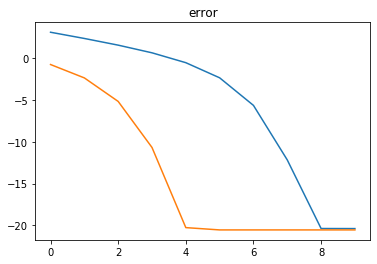

testing newton algo for X_0: [0.0078125 1.       ]
X_n+1 à l'itération 0 est: [48.00976531 -1.15335181]
X_n+1 à l'itération 1 est: [24.02050448 -0.79343544]
X_n+1 à l'itération 2 est: [12.04147556 -0.71180322]
X_n+1 à l'itération 3 est: [ 6.08302251 -0.70712227]
X_n+1 à l'itération 4 est: [ 3.16480522 -0.70710678]
X_n+1 à l'itération 5 est: [ 1.81938402 -0.70710678]
X_n+1 à l'itération 6 est: [ 1.32191944 -0.70710678]
X_n+1 à l'itération 7 est: [ 1.22831653 -0.70710678]
X_n+1 à l'itération 8 est: [ 1.22475006 -0.70710678]
X_n+1 à l'itération 9 est: [ 1.22474487 -0.70710678]
X_n+1 à l'itération 10 est: [ 1.22474487 -0.70710678]
found solution in 10 iterations


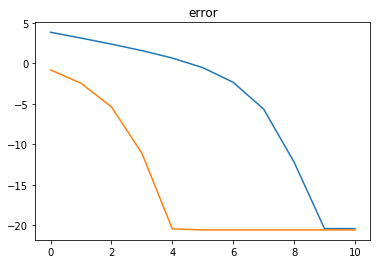

testing newton algo for X_0: [0.00390625 1.        ]
X_n+1 à l'itération 0 est: [96.00488277 -1.13891989]
X_n+1 à l'itération 1 est: [48.01025349 -0.78896617]
X_n+1 à l'itération 2 est: [24.02074841 -0.71135345]
X_n+1 à l'itération 3 est: [12.04159721 -0.70711946]
X_n+1 à l'itération 4 est: [ 6.0830827  -0.70710678]
X_n+1 à l'itération 5 est: [ 3.1648341  -0.70710678]
X_n+1 à l'itération 6 est: [ 1.8193963  -0.70710678]
X_n+1 à l'itération 7 est: [ 1.3219228  -0.70710678]
X_n+1 à l'itération 8 est: [ 1.22831677 -0.70710678]
X_n+1 à l'itération 9 est: [ 1.22475006 -0.70710678]
X_n+1 à l'itération 10 est: [ 1.22474487 -0.70710678]
X_n+1 à l'itération 11 est: [ 1.22474487 -0.70710678]
found solution in 11 iterations


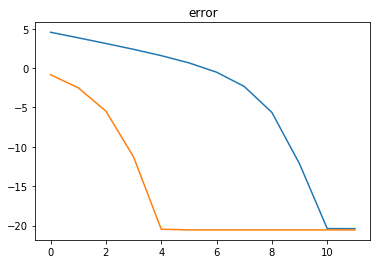

testing newton algo for X_0: [0.00195312 1.        ]
X_n+1 à l'itération 0 est: [192.0024414   -1.13189745]
X_n+1 à l'itération 1 est: [96.0051269  -0.78681679]
X_n+1 à l'itération 2 est: [48.01037553 -0.71114437]
X_n+1 à l'itération 3 est: [24.02080939 -0.70711824]
X_n+1 à l'itération 4 est: [12.04162762 -0.70710678]
X_n+1 à l'itération 5 est: [ 6.08309775 -0.70710678]
X_n+1 à l'itération 6 est: [ 3.16484132 -0.70710678]
X_n+1 à l'itération 7 est: [ 1.81939937 -0.70710678]
X_n+1 à l'itération 8 est: [ 1.32192364 -0.70710678]
X_n+1 à l'itération 9 est: [ 1.22831683 -0.70710678]
X_n+1 à l'itération 10 est: [ 1.22475007 -0.70710678]
X_n+1 à l'itération 11 est: [ 1.22474487 -0.70710678]
X_n+1 à l'itération 12 est: [ 1.22474487 -0.70710678]
found solution in 12 iterations


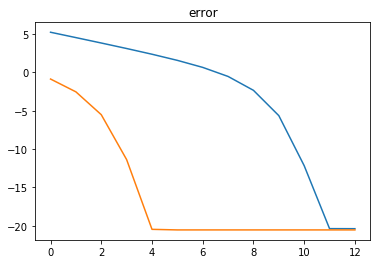

testing newton algo for X_0: [9.765625e-04 1.000000e+00]
X_n+1 à l'itération 0 est: [384.0012207   -1.12843329]
X_n+1 à l'itération 1 est: [192.00256347  -0.78576275]
X_n+1 à l'itération 2 est: [96.00518793 -0.71104357]
X_n+1 à l'itération 3 est: [48.01040604 -0.70711768]
X_n+1 à l'itération 4 est: [24.02082464 -0.70710678]
X_n+1 à l'itération 5 est: [12.04163523 -0.70710678]
X_n+1 à l'itération 6 est: [ 6.08310151 -0.70710678]
X_n+1 à l'itération 7 est: [ 3.16484313 -0.70710678]
X_n+1 à l'itération 8 est: [ 1.81940013 -0.70710678]
X_n+1 à l'itération 9 est: [ 1.32192385 -0.70710678]
X_n+1 à l'itération 10 est: [ 1.22831684 -0.70710678]
X_n+1 à l'itération 11 est: [ 1.22475007 -0.70710678]
X_n+1 à l'itération 12 est: [ 1.22474487 -0.70710678]
X_n+1 à l'itération 13 est: [ 1.22474487 -0.70710678]
found solution in 13 iterations


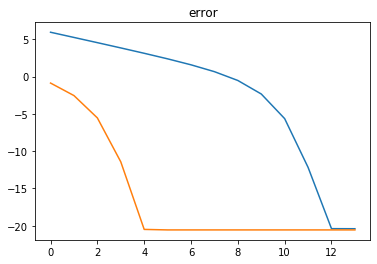

In [12]:
ns = np.arange(1,11)




X_zeros = np.array([np.power(1/2,ns), np.ones(ns.shape)])


for X_0 in X_zeros.T:
    print("testing newton algo for X_0:",X_0)
    
    try:
        newton2(f2,jac_f2,X_0[0],X_0[1])
    except np.linalg.LinAlgError:
        print("algo failed, matrix not inversible,choose new initial values\n\n")

## 6) tracer le cercle et l'hyperbole 

on souhaite visualiser les deux fonctions avec

$$ cos(t)^2 + sin(t)^2 - 1 = 0 , cosh(t)^2 - sinh(t)^2 -1 = 0 $$

In [13]:
def plot():
    x_low,y_low = 0, 2* np.pi
    x_high,y_high = 0, 2*np.pi 

    step = 0.1

    xx, yy = np.meshgrid(np.arange(x_low, x_high, step),
                     np.arange(y_low, y_high, step))

    X_grid = np.c_[xx.ravel(), yy.ravel()]
    
    t_grid

    f1 = np.zeros((xx.shape[0] * xx.shape[1],1))
    f2 = np.zeros((xx.shape[0] * xx.shape[1],1))

    for i, X in enumerate(X_grid):
        
        f1[i] = np.pow(np.cos(X),2)

In [25]:
def sphere_func(x):
    return (np.power(np.cos(x),2) + np.power(np.sin(x),2) )

In [26]:
def hyper_func(x,y):

    return (np.power(np.cosh(x),2) - np.power(np.sinh(y),2) - 1)

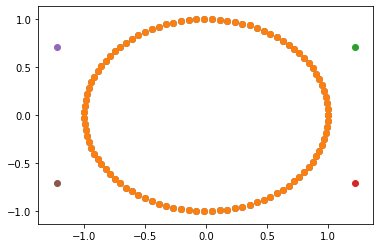

In [38]:

theta = np.linspace(0, 2*np.pi, 100)

r = 1.0

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

x11 = r*np.cos(theta)
x12 = -1.0 * r*np.sin(theta)

plt.scatter(x1,x2)

plt.scatter(x11,x12)

plt.scatter(1.22474487, 0.70710678)
plt.scatter(1.22474487, -0.70710678)
plt.scatter(-1.22474487, 0.70710678)
plt.scatter(-1.22474487, -0.70710678)


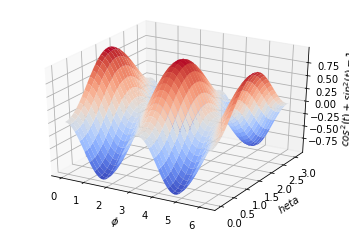

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

step = 0.1

phi, theta = np.mgrid[ 0:2*np.pi:step ,&&& 0:np.pi:step]


fig = plt.figure()
ax = fig.gca(projection='3d')

#axis labels
ax.set_xlabel('$\phi$')
ax.set_ylabel('$\theta$')
ax.set_zlabel('$cos^2(t)+sin^2(t)=1$')
surf = ax.plot_surface(phi, theta, sphere_func(phi,theta), cmap=cm.coolwarm,
                   linewidth=0, antialiased=True)
plt.show()

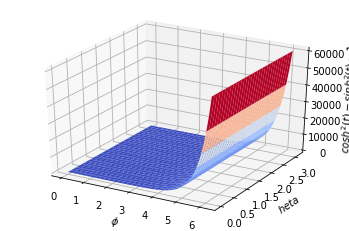

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

step = 0.1

phi, theta = np.mgrid[0:2*np.pi:step, 0:np.pi:step]


fig = plt.figure()
ax = fig.gca(projection='3d')

#axis labels
ax.set_xlabel('$\phi$')
ax.set_ylabel('$\theta$')
ax.set_zlabel('$cosh^2(t)-sinh^2(t)=1$')
surf = ax.plot_surface(phi, theta, hyper_func(phi,theta), cmap=cm.coolwarm,
                   linewidth=0, antialiased=True)
plt.show()